# Проект: Обучение с учителем: качество модели

В Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. 

Необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

Предоставдены данные в табличной форме. 

+ `market_file.csv` - содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

    + `id` — номер покупателя в корпоративной базе данных.
    + `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
    + `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
    + `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
    + `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
    + `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
    + `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
    + `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
    + `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
    + `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца. Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
    + `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
    + `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

+ `market_money.csv` - с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

    + `id` — номер покупателя в корпоративной базе данных.
    + `Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
    + `Выручка` — сумма выручки за период.

+ `market_time.csv` - с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

    + `id` — номер покупателя в корпоративной базе данных.
    + `Период` — название периода, во время которого зафиксировано общее время.
    + `минут` — значение времени, проведённого на сайте, в минутах.

+ `money.csv` - с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

    + `id` — номер покупателя в корпоративной базе данных.
    + `Прибыль` — значение прибыли.


Разобъем задачу на два этапа:

1. Разработаем модель, которая предскажет вероятность снижения покупательской активности.
2. Выделим сегмент покупателей, проанализируем его и предложим, как увеличить его покупательскую активность, используя данные моделирования, данные о прибыли покупателей и исходные данные (если понадобятся). Возможные сегменты:
+ Группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности.
+ Группа клиентов, которые покупают только технику, то есть товары с длинным жизненным циклом.
+ Группа клиентов, которые покупают товары из категории «Товары для себя» (новая категория, которую можно выделить на основе текущих) или «Товары для детей».
+ Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью.

План работы:

1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Объединение таблиц
5. Корреляционный анализ
6. Использование пайплайнов
7. Анализ важности признаков
8. Сегментация покупателей
9. Общий вывод

 1.Загрузка данных

 1.1. Установка пакетов

In [1]:
!pip install phik -q
!pip install shap -q
!pip install --upgrade scikit-learn==1.3.0 -q

1.2. Импорт библиотек

In [2]:
import matplotlib.pyplot as plt

import numpy as np

import pandas  as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

import phik
from phik import phik_matrix

import seaborn as sns

import shap

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


from sklearn.compose import ColumnTransformer

from sklearn.model_selection import (train_test_split, 
                                     GridSearchCV, 
                                     RandomizedSearchCV
                                    )
# импортируем классы
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             precision_score,
                             recall_score,
                             roc_auc_score
                            )

from sklearn.inspection import permutation_importance
# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# загружаем класс pipeline
from sklearn.pipeline import Pipeline
# загружаем классы для подготовки данных
from sklearn.preprocessing import (MinMaxScaler,
                                   OneHotEncoder, 
                                   OrdinalEncoder, 
                                   RobustScaler,
                                   StandardScaler
                                  )

# загружаем нужные модели
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV

# Установка констант
RANDOM_STATE = 42
TEST_SIZE = 0.3

1.3. Загрузка данных

In [3]:
market_file = pd.read_csv('/datasets/market_file.csv', decimal = ',')
market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [4]:
market_money = pd.read_csv('/datasets/market_money.csv', decimal = ',')
market_money.head(10)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
8,215350,предыдущий_месяц,5457.5
9,215351,текущий_месяц,6610.4


In [5]:
market_time = pd.read_csv('/datasets/market_time.csv', decimal = ',')
market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [6]:
money = pd.read_csv('/datasets/money.csv', sep = ';', decimal = ',')
money.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


 2.Предобработка данных

Предобработка `market_file`

In [7]:
# Изменение названий столбцов
market_file.columns = map(str.lower, market_file.columns)
market_file.columns = market_file.columns.str.replace(' ', '_')
# Исправление данных
market_file.тип_сервиса = market_file.тип_сервиса.replace(['стандартт'],'стандарт')
# Изменение типов
market_file.маркет_актив_6_мес = market_file.маркет_актив_6_мес.astype(float) 
market_file.акционные_покупки = market_file.акционные_покупки.astype(float)
print('Явных дубликатов:', market_file.duplicated().sum(), '\n')
market_file.info()

Явных дубликатов: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_с

Предобработка `market_money`

In [8]:
market_money.Период.unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

In [9]:
# Изменение названий столбцов
market_money.columns = map(str.lower, market_money.columns)
# Изменение типов
market_money.выручка = market_money.выручка.astype(float)
# Удаление полных дубликатов
market_money = market_money.drop_duplicates().reset_index(drop=True)
print('Явных дубликатов:', market_money.duplicated().sum(), '\n')
market_money.info()

Явных дубликатов: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


Предобработка `market_time`

In [10]:
# Изменение названий столбцов
market_time.columns = map(str.lower, market_time.columns)
# Исправление данных
market_time.период = market_time.период.replace(['предыдцщий_месяц'],'предыдущий_месяц')
print('Явных дубликатов:', market_time.duplicated().sum(), '\n')
market_time.info()

Явных дубликатов: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


Предобработка `money`

In [11]:
money.columns = map(str.lower, money.columns)
print('Явных дубликатов:', money.duplicated().sum(), '\n')
money.info()

Явных дубликатов: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


Промежуточный итог

В данных не выявлены пропуски.

Были внесены следующие изменения в названия столбцов:
- Приведение к нижнему регистру.
- Замена пробелов на подчеркивание.

В таблице `market_file`:
- В столбце `тип_сервиса` значения `стандартт` были исправлены на `стандарт`.
- Изменены типы данных столбцов:
  - `маркет_актив_6_мес` изменен на `float`.
  - `акционные_покупки` изменен на `float`.

В таблице `market_money`:
- В столбце `период` значения `препредыдущий_месяц` были исправлены на `предыдущий_месяц`.
- Изменен тип данных столбца `выручка` на `float`.
- Удалено пять полных дубликатов.

В таблице `market_time`:
- В столбце `период` значения `предыдцщий_месяц` были исправлены на `предыдущий_месяц`.

3.Исследовательский анализ данных

Проведите исследовательский анализ данных из каждой таблицы и выделите клиентов с покупательской активностью не менее трех месяцев, то есть тех, кто совершал покупки в течение этого периода. Сформулируйте выводы на основе полученных результатов данного шага.

Анализ числовых значений `market_file`

In [12]:
market_file.describe()

,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


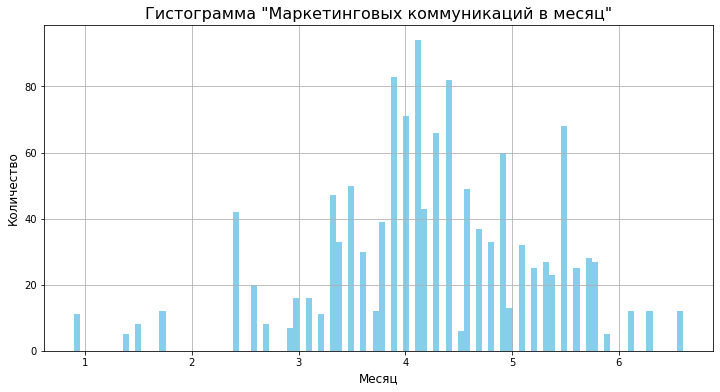

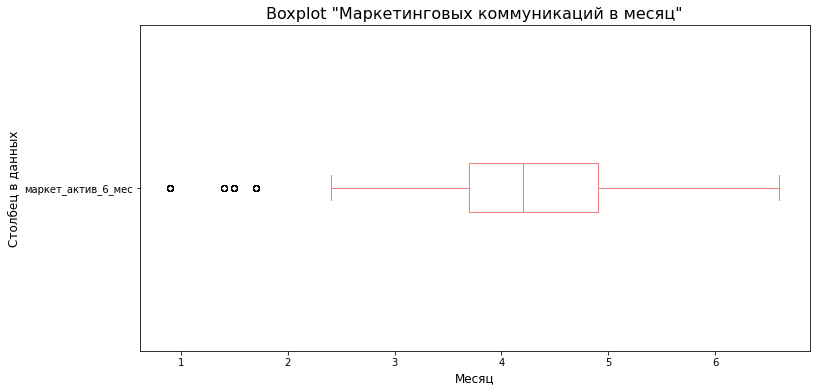

In [13]:
(
    market_file['маркет_актив_6_мес']
    .plot(kind='hist', bins=100, grid=True, figsize=(12, 6), color='skyblue')
)
plt.title('Гистограмма "Маркетинговых коммуникаций в месяц"', fontsize=16)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.show()

(
    market_file['маркет_актив_6_мес']
    .plot(kind='box', vert=False, figsize=(12, 6), color='lightcoral')
)
plt.title('Boxplot "Маркетинговых коммуникаций в месяц"', fontsize=16)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Столбец в данных', fontsize=12)
plt.show()

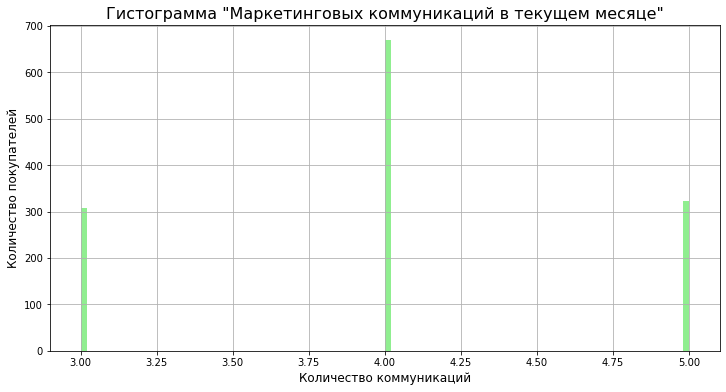

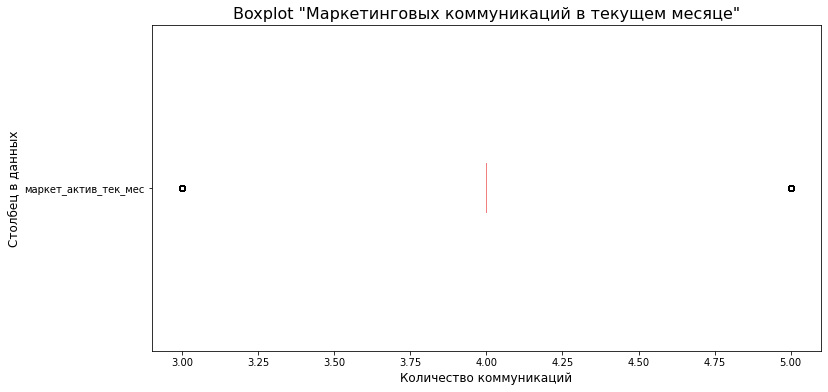

In [14]:
(
    market_file['маркет_актив_тек_мес']
    .plot(kind='hist', bins=100, grid=True, figsize=(12, 6), color='lightgreen')
)
plt.title('Гистограмма "Маркетинговых коммуникаций в текущем месяце"', fontsize=16)
plt.xlabel('Количество коммуникаций', fontsize=12)
plt.ylabel('Количество покупателей', fontsize=12)
plt.show()

(
    market_file['маркет_актив_тек_мес']
    .plot(kind='box', vert=False, figsize=(12, 6), color='lightcoral')
)
plt.title('Boxplot "Маркетинговых коммуникаций в текущем месяце"', fontsize=16)
plt.xlabel('Количество коммуникаций', fontsize=12)
plt.ylabel('Столбец в данных', fontsize=12)
plt.show()


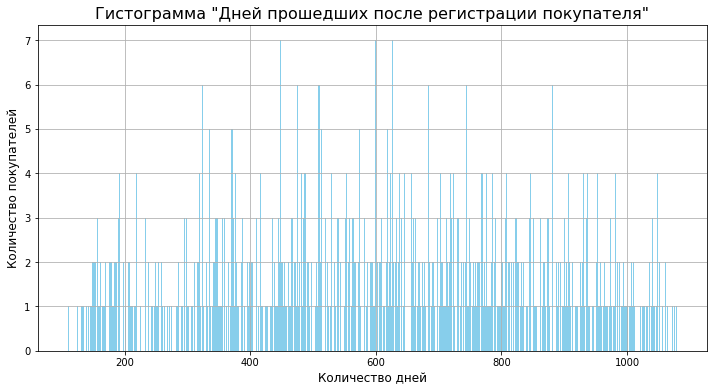

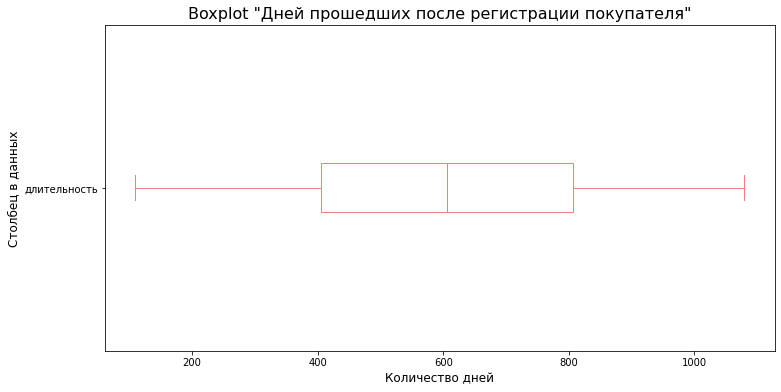

In [15]:
(
    market_file['длительность']
    .plot(kind='hist', bins=1000, grid=True, figsize=(12, 6), color='skyblue')
)
plt.title('Гистограмма "Дней прошедших после регистрации покупателя"', fontsize=16)
plt.xlabel('Количество дней', fontsize=12)
plt.ylabel('Количество покупателей', fontsize=12)
plt.show()

(
    market_file['длительность']
    .plot(kind='box', vert=False, figsize=(12, 6), color='lightcoral')
)
plt.title('Boxplot "Дней прошедших после регистрации покупателя"', fontsize=16)
plt.xlabel('Количество дней', fontsize=12)
plt.ylabel('Столбец в данных', fontsize=12)
plt.show()

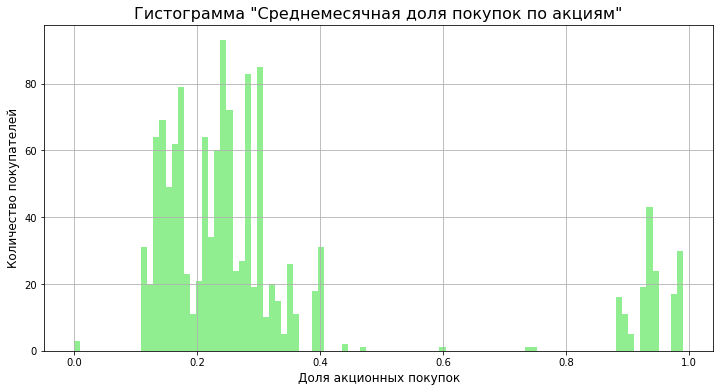

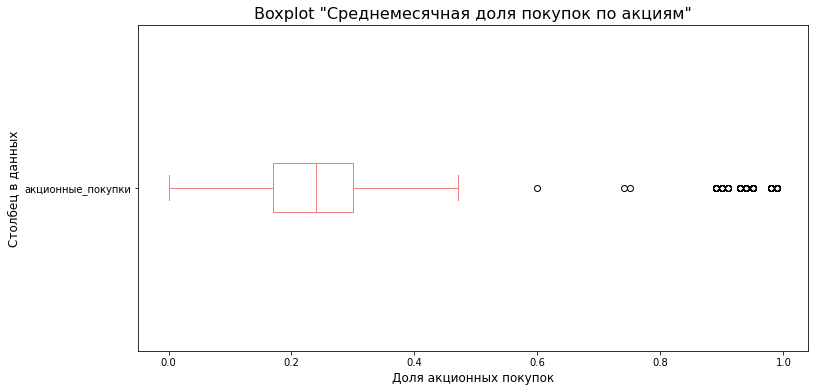

In [16]:
(
    market_file['акционные_покупки']
    .plot(kind='hist', bins=100, grid=True, figsize=(12, 6), color='lightgreen')
)
plt.title('Гистограмма "Среднемесячная доля покупок по акциям"', fontsize=16)
plt.xlabel('Доля акционных покупок', fontsize=12)
plt.ylabel('Количество покупателей', fontsize=12)
plt.show()

(
    market_file['акционные_покупки']
    .plot(kind='box', vert=False, figsize=(12, 6), color='lightcoral')
)
plt.title('Boxplot "Среднемесячная доля покупок по акциям"', fontsize=16)
plt.xlabel('Доля акционных покупок', fontsize=12)
plt.ylabel('Столбец в данных', fontsize=12)
plt.show()

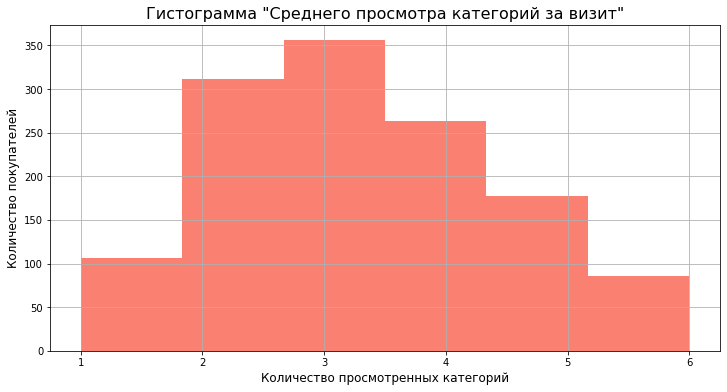

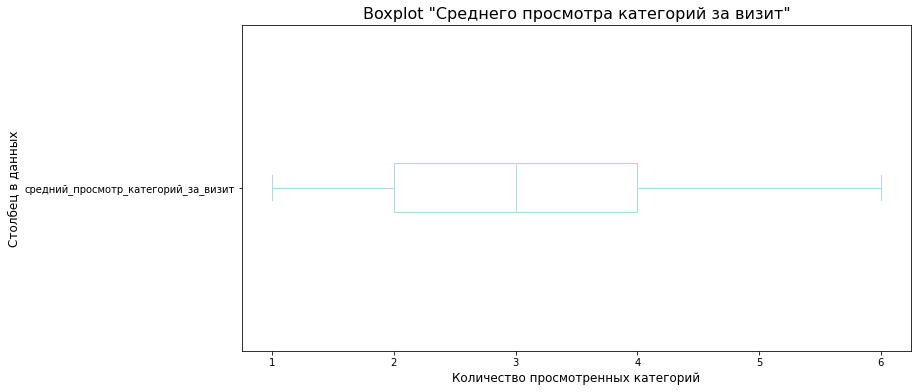

In [17]:
(
    market_file['средний_просмотр_категорий_за_визит']
    .plot(kind='hist', bins=6, grid=True, figsize=(12, 6), color='salmon')
)
plt.title('Гистограмма "Среднего просмотра категорий за визит"', fontsize=16)
plt.xlabel('Количество просмотренных категорий', fontsize=12)
plt.ylabel('Количество покупателей', fontsize=12)
plt.show()

(
    market_file['средний_просмотр_категорий_за_визит']
    .plot(kind='box', vert=False, figsize=(12, 6), color='lightblue')
)
plt.title('Boxplot "Среднего просмотра категорий за визит"', fontsize=16)
plt.xlabel('Количество просмотренных категорий', fontsize=12)
plt.ylabel('Столбец в данных', fontsize=12)
plt.show()

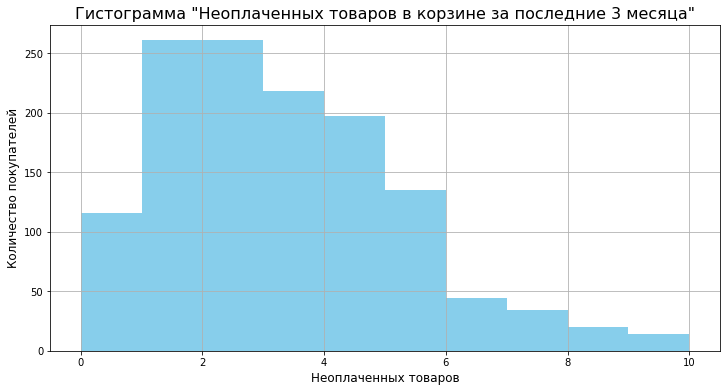

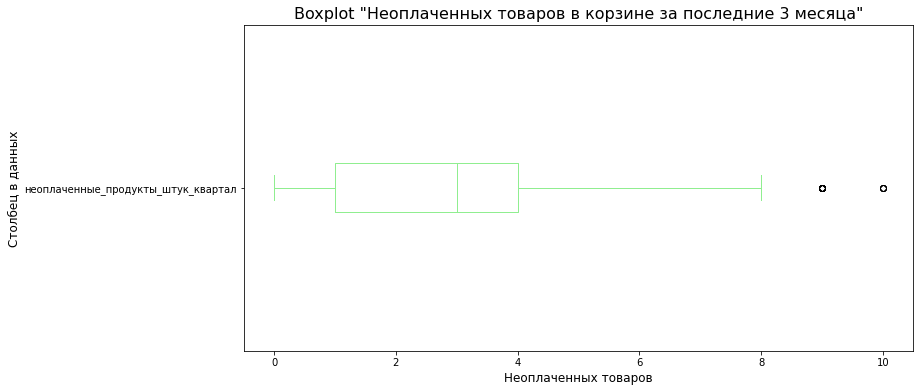

In [18]:
(
    market_file['неоплаченные_продукты_штук_квартал']
    .plot(kind='hist', bins=10, grid=True, figsize=(12, 6), color='skyblue')
)
plt.title('Гистограмма "Неоплаченных товаров в корзине за последние 3 месяца"', fontsize=16)
plt.xlabel('Неоплаченных товаров', fontsize=12)
plt.ylabel('Количество покупателей', fontsize=12)
plt.show()

(
    market_file['неоплаченные_продукты_штук_квартал']
    .plot(kind='box', vert=False, figsize=(12, 6), color='lightgreen')
)
plt.title('Boxplot "Неоплаченных товаров в корзине за последние 3 месяца"', fontsize=16)
plt.xlabel('Неоплаченных товаров', fontsize=12)
plt.ylabel('Столбец в данных', fontsize=12)
plt.show()

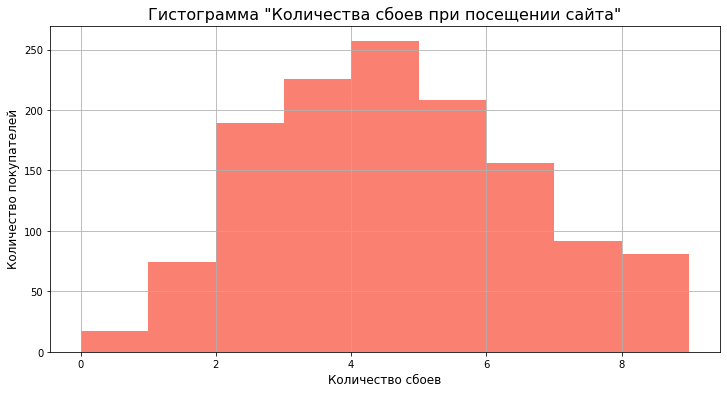

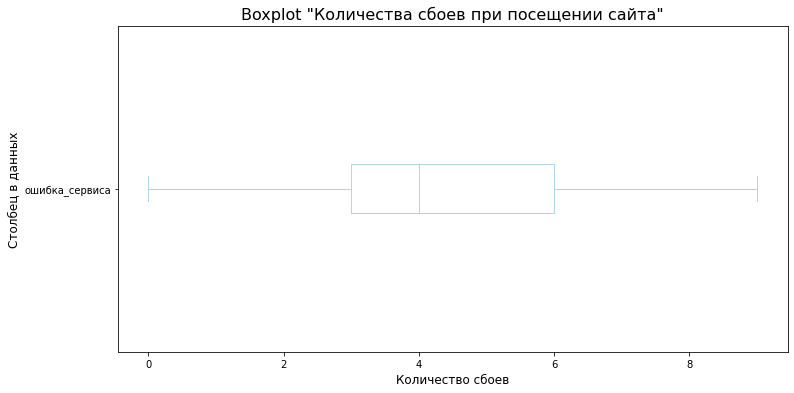

In [19]:
(
    market_file['ошибка_сервиса']
    .plot(kind='hist', bins=9, grid=True, figsize=(12, 6), color='salmon')
)
plt.title('Гистограмма "Количества сбоев при посещении сайта"', fontsize=16)
plt.xlabel('Количество сбоев', fontsize=12)
plt.ylabel('Количество покупателей', fontsize=12)
plt.show()

(
    market_file['ошибка_сервиса']
    .plot(kind='box', vert=False, figsize=(12, 6), color='lightblue')
)
plt.title('Boxplot "Количества сбоев при посещении сайта"', fontsize=16)
plt.xlabel('Количество сбоев', fontsize=12)
plt.ylabel('Столбец в данных', fontsize=12)
plt.show()


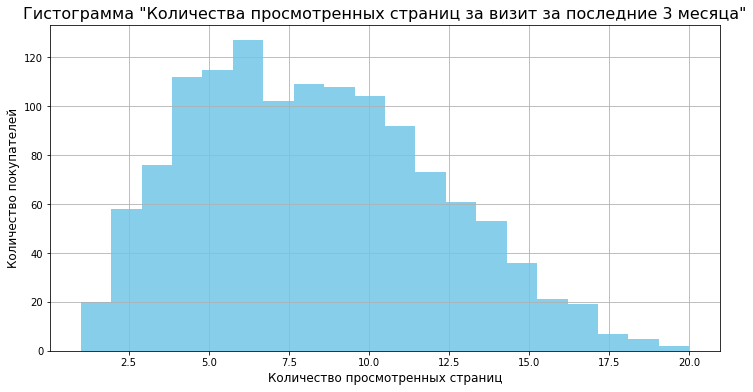

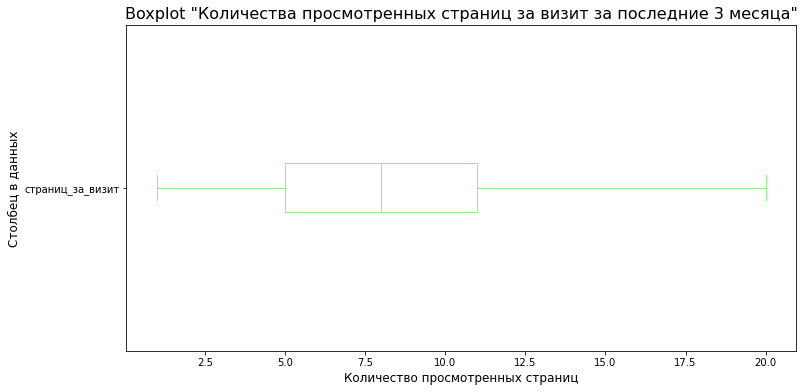

In [20]:
(
    market_file['страниц_за_визит']
    .plot(kind='hist', bins=20, grid=True, figsize=(12, 6), color='skyblue')
)
plt.title('Гистограмма "Количества просмотренных страниц за визит за последние 3 месяца"', fontsize=16)
plt.xlabel('Количество просмотренных страниц', fontsize=12)
plt.ylabel('Количество покупателей', fontsize=12)
plt.show()

(
    market_file['страниц_за_визит']
    .plot(kind='box', vert=False, figsize=(12, 6), color='lightgreen')
)
plt.title('Boxplot "Количества просмотренных страниц за визит за последние 3 месяца"', fontsize=16)
plt.xlabel('Количество просмотренных страниц', fontsize=12)
plt.ylabel('Столбец в данных', fontsize=12)
plt.show()


Анализ строковых значений `market_file`

In [21]:
market_file.describe(include='object')

,покупательская_активность,тип_сервиса,разрешить_сообщать,популярная_категория
count,1300,1300,1300,1300
unique,2,2,2,6
top,Прежний уровень,стандарт,да,Товары для детей
freq,802,924,962,330


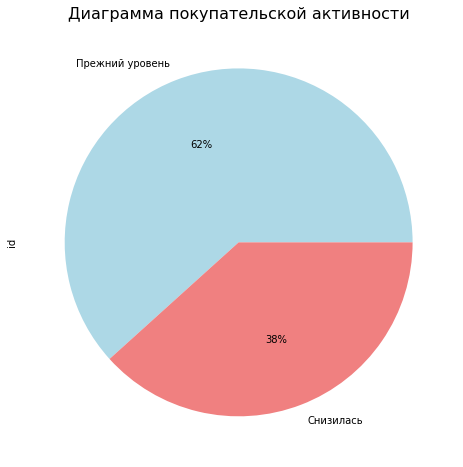

In [22]:
(
    market_file
    .pivot_table(index='покупательская_активность', values='id', aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(12, 8), colors=['lightblue', 'lightcoral'])
)
plt.title('Диаграмма покупательской активности', fontsize=16)
plt.legend().remove()
plt.show()

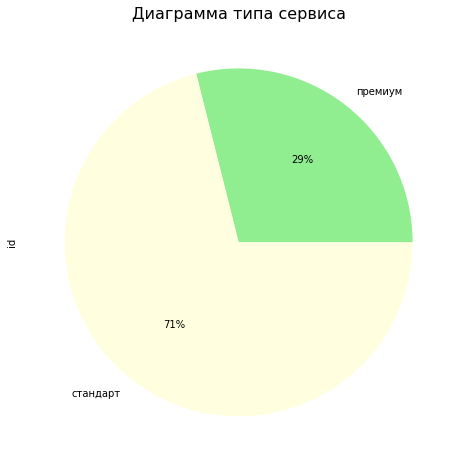

In [23]:
(
    market_file
    .pivot_table(index='тип_сервиса', values='id', aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(12, 8), colors=['lightgreen', 'lightyellow'])
)
plt.title('Диаграмма типа сервиса', fontsize=16)
plt.legend().remove()
plt.show()

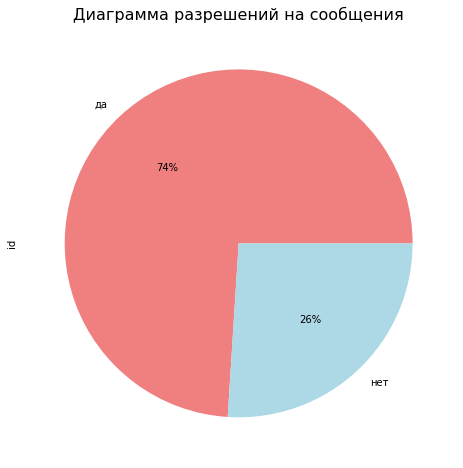

In [24]:
(
    market_file
    .pivot_table(index='разрешить_сообщать', values='id', aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(12, 8), colors=['lightcoral', 'lightblue'])
)
plt.title('Диаграмма разрешений на сообщения', fontsize=16)
plt.legend().remove()
plt.show()

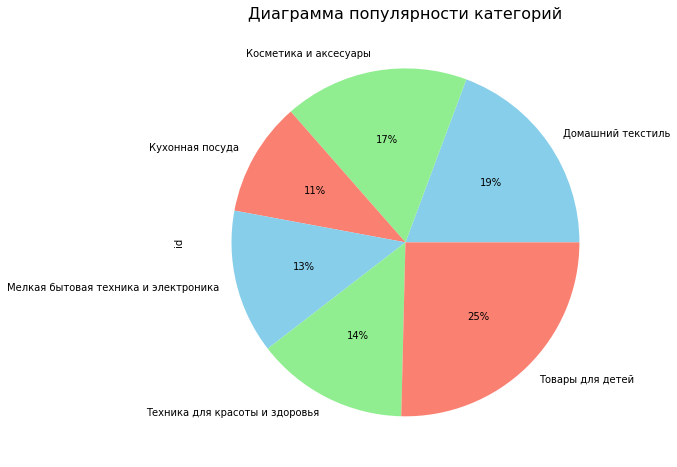

In [25]:
(
    market_file
    .pivot_table(index='популярная_категория',values='id',aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(12, 8), colors=['skyblue', 'lightgreen', 'salmon'])
)
plt.title('Диаграмма популярности категорий', fontsize=16)
plt.legend().remove()
plt.show()

Анализ `market_money`

В соответствии с заданием необходимо отобрать клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.

Оставим в таблице только клиентов которые активны все три месяца.

In [26]:
market_money = market_money[market_money.id.isin(market_money.query('выручка==0')['id'].unique())==False] 
market_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891 entries, 3 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3891 non-null   int64  
 1   период   3891 non-null   object 
 2   выручка  3891 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 121.6+ KB


Анализ числовых значений `market_money`

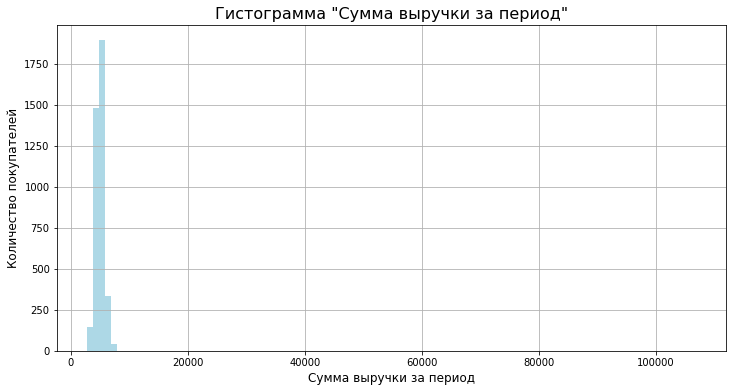

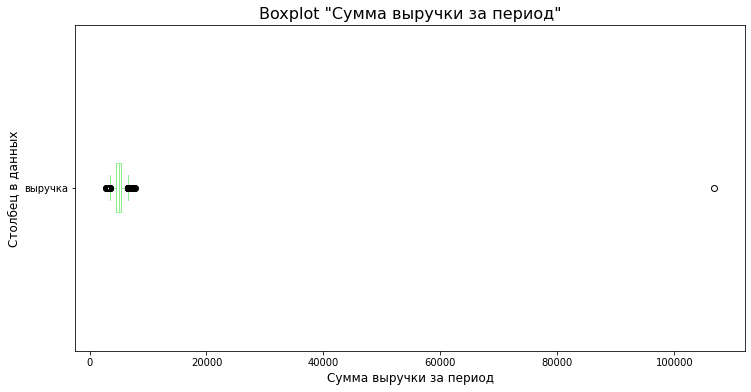

In [27]:
(
    market_money['выручка']
    .plot(kind='hist', bins=100, grid=True, figsize=(12, 6), color='lightblue')
)
plt.title('Гистограмма "Сумма выручки за период"', fontsize=16)
plt.xlabel('Сумма выручки за период', fontsize=12)
plt.ylabel('Количество покупателей', fontsize=12)
plt.show()

(
    market_money['выручка']
    .plot(kind='box', vert=False, figsize=(12, 6), color='lightgreen')
)
plt.title('Boxplot "Сумма выручки за период"', fontsize=16)
plt.xlabel('Сумма выручки за период', fontsize=12)
plt.ylabel('Столбец в данных', fontsize=12)
plt.show()


In [28]:
market_money.sort_values(by='выручка', ascending=False).head()

,id,период,выручка
98,215380,текущий_месяц,106862.2
435,215493,текущий_месяц,7799.4
262,215435,текущий_месяц,7605.3
1481,215841,текущий_месяц,7557.0
2388,216144,текущий_месяц,7547.8


Возможно это оптовый покупатель или подведение итогов за период, возможно ошибка при вводе данных. Примем решение заменить на медианное значение.

In [29]:
market_money.loc[98,'выручка'] = market_money['выручка'].median()
market_money.iloc[[98]]

,id,период,выручка
107,215383,текущий_месяц,5989.0


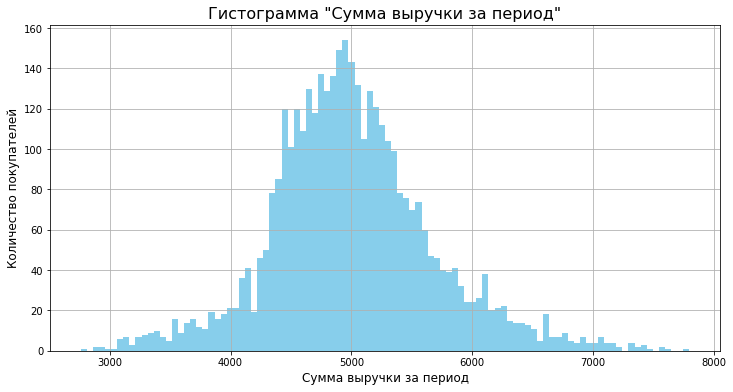

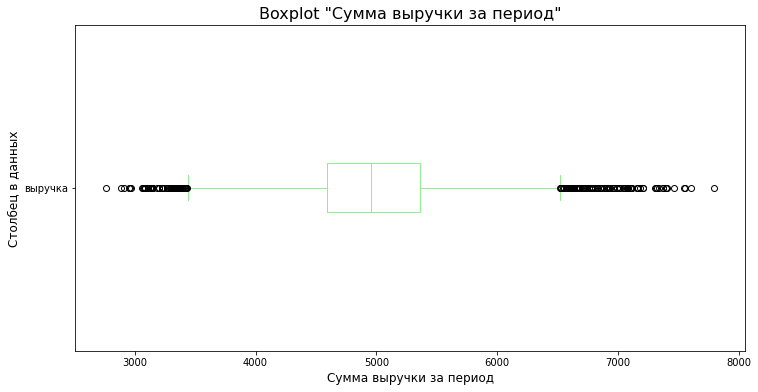

In [30]:
(
    market_money['выручка']
    .plot(kind='hist', bins=100, grid=True, figsize=(12, 6), color='skyblue')
)
plt.title('Гистограмма "Сумма выручки за период"', fontsize=16)
plt.xlabel('Сумма выручки за период', fontsize=12)
plt.ylabel('Количество покупателей', fontsize=12)
plt.show()

(
    market_money['выручка']
    .plot(kind='box', vert=False, figsize=(12, 6), color='lightgreen')
)
plt.title('Boxplot "Сумма выручки за период"', fontsize=16)
plt.xlabel('Сумма выручки за период', fontsize=12)
plt.ylabel('Столбец в данных', fontsize=12)
plt.show()


Анализ строковых значений `market_money`

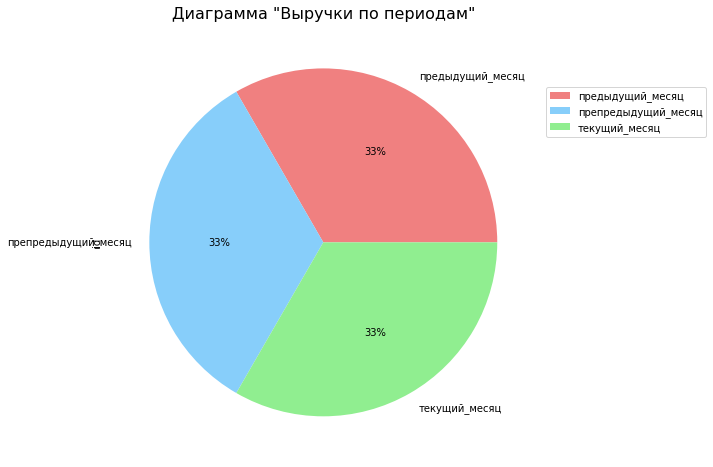

In [31]:
(
    market_money
    .pivot_table(index='период', values='id', aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(12, 8), colors=['lightcoral', 'lightskyblue', 'lightgreen'])
)
plt.title('Диаграмма "Выручки по периодам"', fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.show()

Анализ числовых значений `market_time`

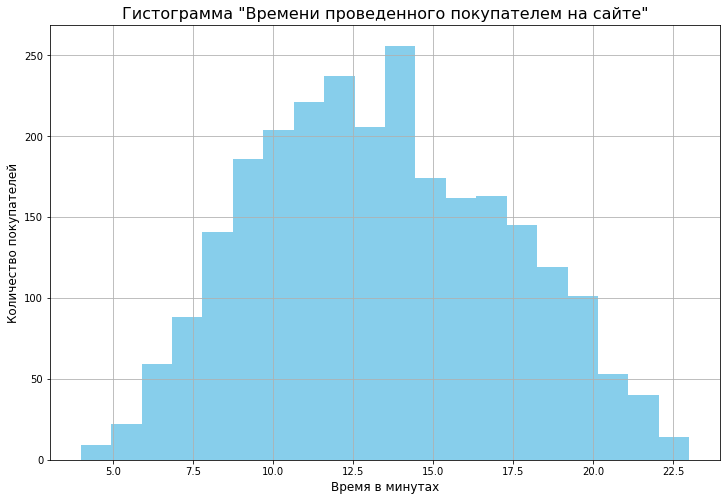

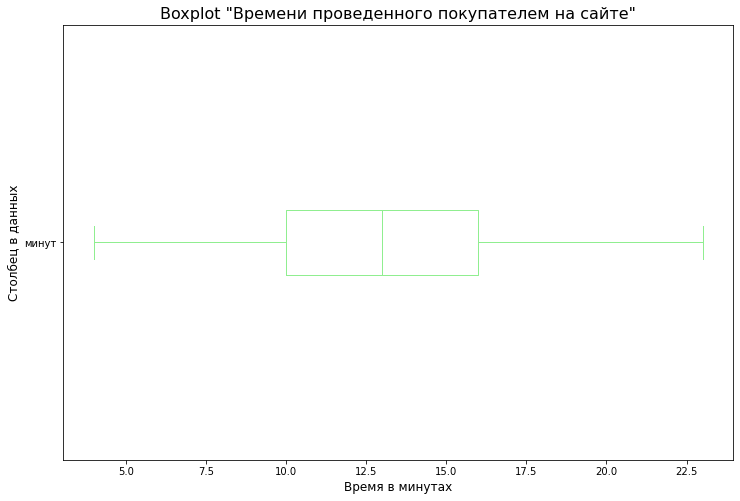

In [32]:
(
    market_time['минут']
    .plot(kind='hist', bins=20, grid=True, figsize=(12, 8), color='skyblue')
)
plt.title('Гистограмма "Времени проведенного покупателем на сайте"', fontsize=16)
plt.xlabel('Время в минутах', fontsize=12)
plt.ylabel('Количество покупателей', fontsize=12)
plt.show()

(
    market_time['минут']
    .plot(kind='box', vert=False, figsize=(12, 8), color='lightgreen')
)
plt.title('Boxplot "Времени проведенного покупателем на сайте"', fontsize=16)
plt.xlabel('Время в минутах', fontsize=12)
plt.ylabel('Столбец в данных', fontsize=12)
plt.show()

Анализ строковых значений `market_time`

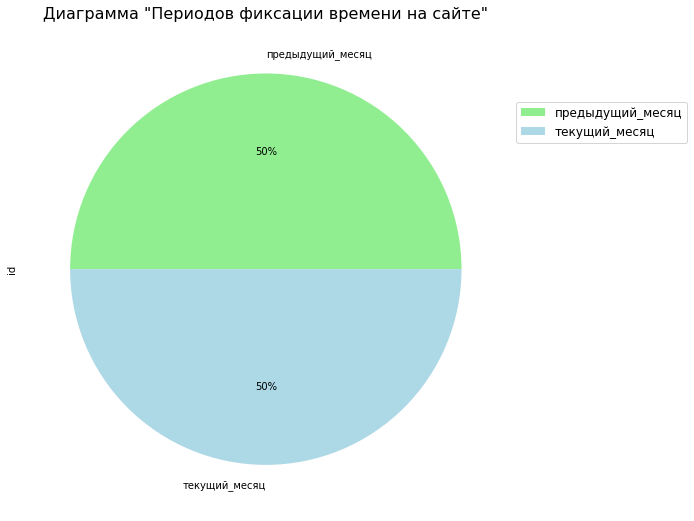

In [33]:
(
    market_time
    .pivot_table(index='период', values='id', aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(14, 9), colors=['lightgreen', 'lightblue', 'lightcoral', 'lightskyblue'])
)
plt.title('Диаграмма "Периодов фиксации времени на сайте"', fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8), fontsize=12)
plt.show()

Анализ строковых значений `money`

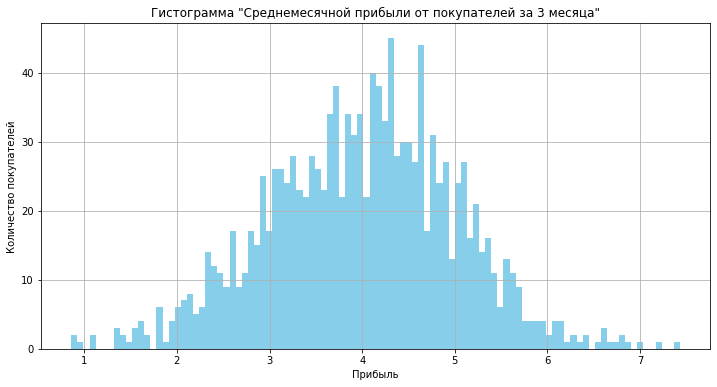

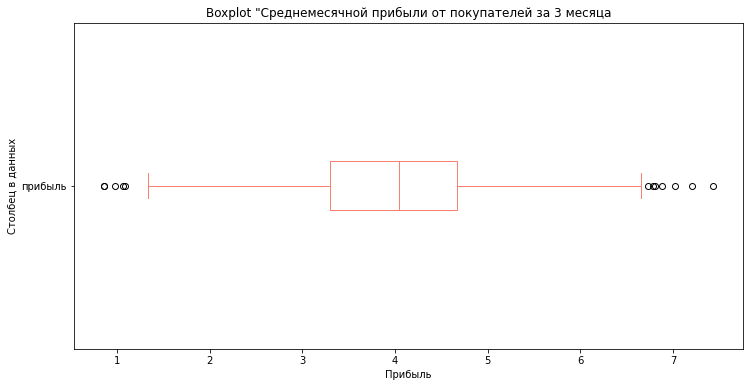

In [34]:
(
    money['прибыль']
    .plot(kind='hist', bins=100, grid=True, figsize=(12, 6), color='skyblue')
)
plt.title('Гистограмма "Среднемесячной прибыли от покупателей за 3 месяца"')
plt.xlabel('Прибыль')
plt.ylabel('Количество покупателей')
plt.show()

(
    money['прибыль']
    .plot(kind='box', vert=False, figsize=(12, 6), color='yellow')
)
plt.title('Boxplot "Среднемесячной прибыли от покупателей за 3 месяца')
plt.xlabel('Прибыль')
plt.ylabel('Столбец в данных')
plt.show()

Промежуточный итог

Представленные данные в своем большинстве распределены нормально.
Обнаружены выбросы в большинстве данных.

Столбцы `период` в `market_money` и `market_time` являются разными по своей значимости, но названия одинаковые, это необходимо учитывать при объединении таблиц.

Активные пользователи за последние 3 месяца (делали покупки каждый месяц) отобраны полный перечень находится в таблице `market_money` 1297 покупателей.

С учетом указанного проведение дальнейших исследований ВОЗМОЖНО.

 4.Объединение таблиц

 4.1. Подготовка таблиц перед объединением. 

In [35]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

Подготовка `market_time`

In [36]:
print(market_time.info(), '\n')

df_1 = market_time[market_time['период']=='предыдущий_месяц'].copy()
df_1.rename(columns={'минут':'минут_предыдущего_месяца'},inplace=True)
df_1.drop('период', axis= 1 , inplace= True )

df_2 = market_time[market_time['период']=='текущий_месяц'].copy()
df_2.rename(columns={'минут':'минут_текущего_месяца'},inplace=True)
df_2.drop('период', axis= 1 , inplace= True )

df_market_time = pd.merge(df_1, df_2, on='id', sort=True)

print(df_market_time.info())
df_market_time.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB
None 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   id                        1300 non-null   int64
 1   минут_предыдущего_месяца  1300 non-null   int64
 2   минут_текущего_месяца     1300 non-null   int64
dtypes: int64(3)
memory usage: 40.6 KB
None


,id,минут_предыдущего_месяца,минут_текущего_месяца
0,215348,13,14
1,215349,12,10
2,215350,8,13
3,215351,11,13
4,215352,8,11


Подготовка `market_money`

In [37]:
#print(market_money.info(), '\n')
df_1 = market_money[market_money['период']=='текущий_месяц'].copy()
df_1.rename(columns={'выручка':'выручка_предыдущего_месяца'},inplace=True)
df_1.drop('период', axis= 1 , inplace= True )
df_2 = market_money[market_money['период']=='предыдущий_месяц'].copy()
df_2.rename(columns={'выручка':'выручка_текущего_месяца'},inplace=True)
df_2.drop('период', axis= 1 , inplace= True )
df_3 = market_money[market_money['период']=='препредыдущий_месяц'].copy()
df_3.rename(columns={'выручка':'выручка_препредыдущего_месяца'},inplace=True)
df_3.drop('период', axis= 1 , inplace= True )
df_market_money = pd.merge(df_1, df_2, on='id', sort=True)
df_market_money = pd.merge(df_3, df_market_money, on='id', sort=True)
print(df_market_money.info())
df_market_money.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1296
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             1297 non-null   int64  
 1   выручка_препредыдущего_месяца  1297 non-null   float64
 2   выручка_предыдущего_месяца     1297 non-null   float64
 3   выручка_текущего_месяца        1297 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 50.7 KB
None


,id,выручка_препредыдущего_месяца,выручка_предыдущего_месяца,выручка_текущего_месяца
0,215349,4472.0,4971.6,5216.0
1,215350,4826.0,5058.4,5457.5
2,215351,4793.0,6610.4,6158.0
3,215352,4594.0,5872.5,5807.5
4,215353,5124.0,5388.5,4738.5


4.2. Объединение таблиц `market_file`, `market_money`, `market_time`. 

In [38]:
df = pd.merge(df_market_money, pd.merge(df_market_time, market_file, on='id', sort=True), on='id', sort=True)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1296
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1297 non-null   int64  
 1   выручка_препредыдущего_месяца        1297 non-null   float64
 2   выручка_предыдущего_месяца           1297 non-null   float64
 3   выручка_текущего_месяца              1297 non-null   float64
 4   минут_предыдущего_месяца             1297 non-null   int64  
 5   минут_текущего_месяца                1297 non-null   int64  
 6   покупательская_активность            1297 non-null   object 
 7   тип_сервиса                          1297 non-null   object 
 8   разрешить_сообщать                   1297 non-null   object 
 9   маркет_актив_6_мес                   1297 non-null   float64
 10  маркет_актив_тек_мес                 1297 non-null   int64  
 11  длительность                  

,id,выручка_препредыдущего_месяца,выручка_предыдущего_месяца,выручка_текущего_месяца,минут_предыдущего_месяца,минут_текущего_месяца,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215349,4472.0,4971.6,5216.0,12,10,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
1,215350,4826.0,5058.4,5457.5,8,13,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
2,215351,4793.0,6610.4,6158.0,11,13,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
3,215352,4594.0,5872.5,5807.5,8,11,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
4,215353,5124.0,5388.5,4738.5,10,10,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4


Промежуточный итог

Данные успешно объедены в `df` проведено преобразование данных:
+ столбец `выручка` удален созданы новые столбцы:
    + `выручка_предыдущего_месяца`
    + `выручка_текущего_месяца`
+ столбец `минут` удален созданы новые столбцы:
    + `минут_предыдущего_месяца`
    + `минут_текущего_месяца`
  
Дальнейший анализ ВОЗМОЖЕН.

5.Корреляционный анализ

Построим тепловую карту корреляции Спирмена для количественных данных распределение которых ненормальное с выбросами.

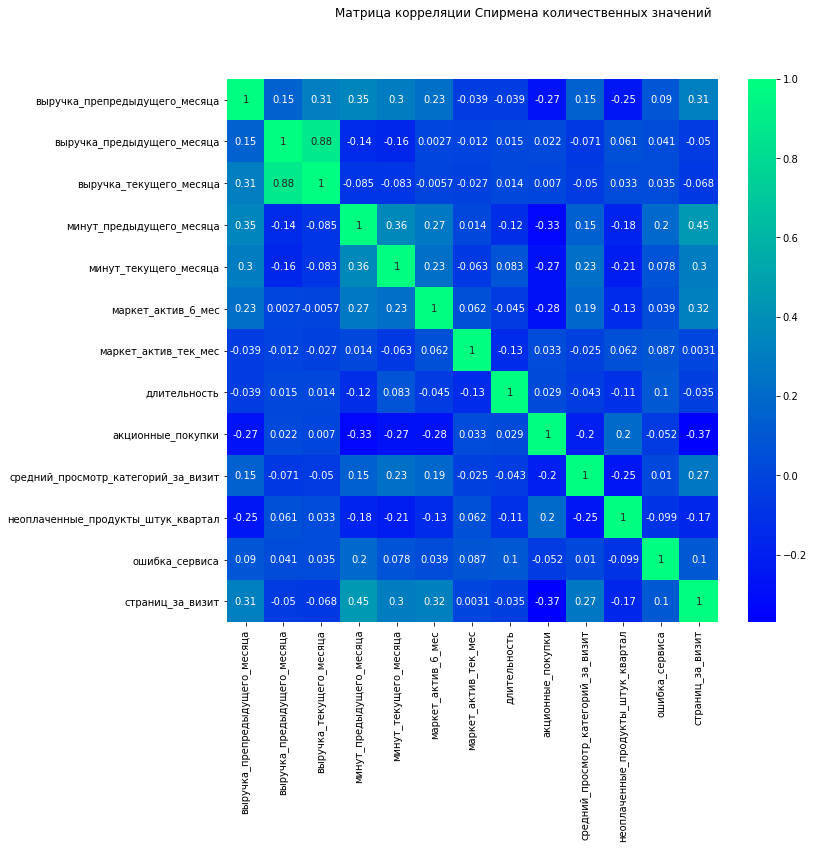

In [39]:
fig, ax = plt.subplots(figsize=(11, 10))
plt.suptitle('Матрица корреляции Спирмена количественных значений')
sns.heatmap(df.drop('id', axis=1).corr(method="spearman"), annot=True, cmap='winter');

Построим тепловую карту корреляции phi(k) для количественных данных распределение которых ненормальное с выбросами.

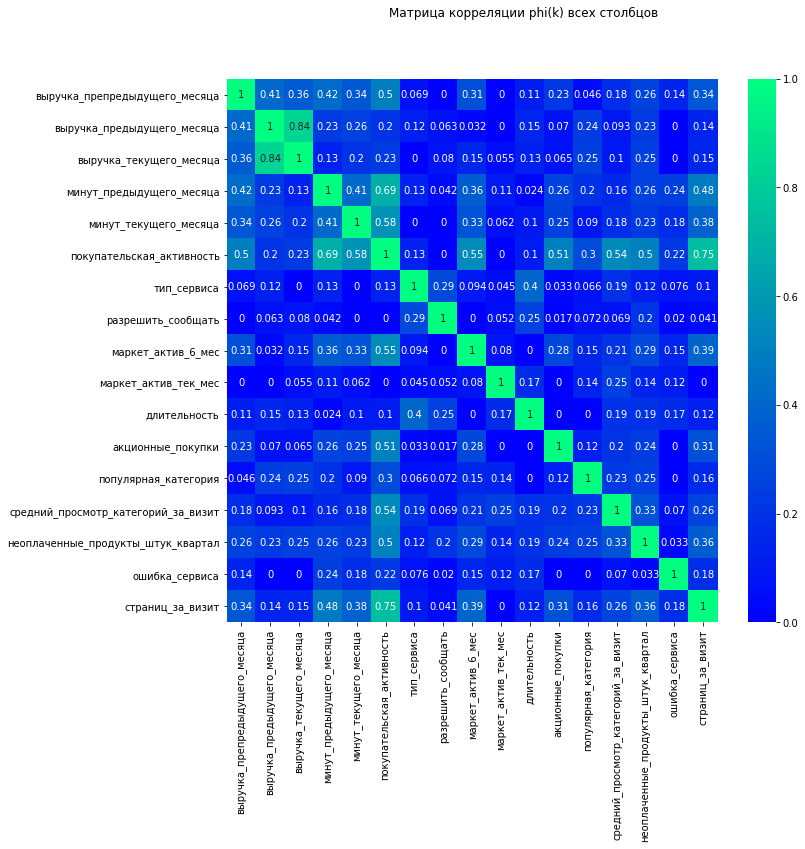

In [40]:
interval_cols = ['выручка_препредыдущего_месяца',
                 'выручка_предыдущего_месяца', 
                 'выручка_текущего_месяца',
                 'минут_предыдущего_месяца',
                 'минут_текущего_месяца',
                 'маркет_актив_6_мес',
                 'маркет_актив_тек_мес',
                 'длительность',
                 'акционные_покупки',
                 'средний_просмотр_категорий_за_визит',
                 'неоплаченные_продукты_штук_квартал',
                 'ошибка_сервиса',
                 'страниц_за_визит'
                ]
fig, ax = plt.subplots(figsize=(11, 10))
plt.suptitle('Матрица корреляции phi(k) всех столбцов')
sns.heatmap(df.drop('id', axis=1).phik_matrix(interval_cols=interval_cols), annot=True, cmap='winter');

Промежуточный итог

Между входными параметрами отсутствует связь выше 0,9, следовательно, при обучении модели не нужно учитывать мультиколлинеарность.
- Максимальное значение корреляции Спирмена (непараметрическая мера оценивающая монотонность связи) corr(S) = 0,87.
- Максимальное значение корреляции phi(k) (учитывает нелинейную зависимость и возвращается к коэффициенту корреляции Пирсона в случае бинарного нормального распределения входных данных) phi(k) = 0,75.

6.Использование пайплайнов

6.1.Подготовка данных.

In [41]:

# Отделение целевого признака
X = df.drop(['покупательская_активность', 'id'], axis=1)
y = df['покупательская_активность']

# Использование LabelEncoder для кодирования целевого признака
le = LabelEncoder()
y = le.fit_transform(y)

# Опциональная инверсия классов (если необходимо)
# y = 1 - y  # если нужно инвертировать метки

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((972, 16), (325, 16), (972,), (325,))

In [42]:
# создаём списки с названиями признаков
ohe_columns = ['разрешить_сообщать',                  #6
               'популярная_категория'                #11
              ]
ord_columns = ['тип_сервиса'                         #5
               
              ]
num_columns = ['выручка_препредыдущего_месяца',       #0
               'выручка_предыдущего_месяца',          #1
               'выручка_текущего_месяца',             #2
               'минут_предыдущего_месяца',            #3
               'минут_текущего_месяца',               #4
               'маркет_актив_6_мес',                  #7
               'маркет_актив_тек_мес',                #8
               'длительность',                        #9
               'акционные_покупки',                   #10
               'средний_просмотр_категорий_за_визит', #12
               'неоплаченные_продукты_штук_квартал',  #13
               'ошибка_сервиса',                      #14
               'страниц_за_визит'                     #15
              ]

In [43]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
    ]
)

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord', OrdinalEncoder(
                categories=[
                    ['стандарт',
                     'премиум'
                    ],
                ], 
                handle_unknown='use_encoded_value', unknown_value=-1
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

6.2 Обучим модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC().

Для сравнения результатов работы обученных моделей необходимо выбрать универсальную метрику. Такой является `ROC-AUC` - метрика модели машинного обучения, которая отображает истинную и постоянную способность модели к прогнозированию. У хорошей модели классификации показатель `ROC-AUC` должен быть больше 0.9 и в общем случае должен стремиться к 1. При этом указанное значение должно выбираться на основе результатов на тестовой выборке.

- Кривая ROC отображает частоту истинных положительных и ложных срабатываний при различных порогах классификации, тогда как AUC показывает совокупную меру производительности модели машинного обучения по всем возможным порогам классификации.
- ROC означает «Receiver Operating Characteristic» (кривая рабочих характеристик приемника). Это – график, который показывает эффективность модели машинного обучения при решении задачи классификации, отображая частоту истинных срабатываний и частоту ложных срабатываний. AUC расшифровывается как «Area Under the Curve» (площадь под кривой). Она используется для измерения всей площади под кривой ROC.

Тестирование всех моделей

In [44]:
# Создаем DataFrame для хранения результатов выбора моделей
choosing_model_separately = pd.DataFrame()

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', SVC(random_state=RANDOM_STATE))
])

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 820),
        'models__max_features': range(2, 19),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
        'preprocessor__ord': [ord_pipe, ohe_pipe]
    },
                                   
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
        'preprocessor__ord': [ord_pipe, ohe_pipe]
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 16),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
        'preprocessor__ord': [ord_pipe, ohe_pipe]
    },
    
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__kernel': ['poly', 'rbf', 'sigmoid'],
        'models__degree': range(2, 18),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
        'preprocessor__ord': [ord_pipe, ohe_pipe]
    }
]

rs = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

rs.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', rs.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке:', rs.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                        

In [45]:
# проверьте работу модели на тестовой выборке
# рассчитайте прогноз вероятностей класса 1 на тестовых данных

y_test_prob = rs.predict_proba(X_test)[:, 1] 
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_prob)}')


Метрика ROC-AUC на тестовой выборке: 0.8080966137056652


In [46]:
# Рассчитываем метрики для ROC-AUC на обучающей и тестовой выборках
roc_auc_rs_train = roc_auc_score(y_train, rs.predict_proba(X_train)[:, 1])
print('Площадь ROC-кривой на обучающей выборке:', roc_auc_rs_train)
roc_auc_rs_test = roc_auc_score(y_test, rs.predict_proba(X_test)[:, 1])
print('Площадь ROC-кривой на тестовой выборке:', roc_auc_rs_test)
roc_auc_rs_km = (roc_auc_rs_test - roc_auc_rs_train) / roc_auc_rs_train * 100
print(f'Потеря качества на тестовой выборке  = {roc_auc_rs_km:.2f} %')

Площадь ROC-кривой на обучающей выборке: 1.0
Площадь ROC-кривой на тестовой выборке: 0.8080966137056652
Потеря качества на тестовой выборке  = -19.19 %


In [47]:
choosing_model_1 = pd.DataFrame(rs.cv_results_).sort_values(by=['rank_test_score']).head(1)
choosing_model_1['roc_auc_proba_train'] = roc_auc_rs_train
choosing_model_1['roc_auc_proba_test'] = roc_auc_rs_test
choosing_model_1['roc_auc_test_km'] = roc_auc_rs_km

choosing_model_separately = pd.concat([choosing_model_separately, choosing_model_1], ignore_index= True )
choosing_model_separately[['rank_test_score', 'param_models', 'mean_test_score','params']].sort_values(by=['mean_test_score'], ascending = False)

,rank_test_score,param_models,mean_test_score,params
0,1,"DecisionTreeClassifier(max_depth=57, max_features=15, random_state=42)",0.81661,"{'preprocessor__ord': (SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)), 'preprocessor__num': StandardScaler(), 'models__max_features': 15, 'models__max_depth': 57, 'models': DecisionTreeClassifier(max_depth=57, max_features=15, random_state=42)}"


Промежуточный итог

Параметры лучшей модели:\
`DecisionTreeClassifier(max_depth=57,max_features=15,random_state=42))`, \
`'preprocessor__ord': (SimpleImputer(strategy='most_frequent'),\
OneHotEncoder(drop='first',handle_unknown=ignore, sparse=False)), \
'preprocessor__num': StandardScaler(), \


Переобучим лучшую модель: `DecisionTreeClassifier(max_depth=57,max_features=15,random_state=42)`\
Параметры преобразования: `'num', RobustScaler()`\
Изначально были заложены в preprocessor `('num', RobustScaler(), num_columns)`

In [48]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('model', DecisionTreeClassifier(max_depth=57, max_features=15, random_state=42))
])

pipe_final.fit(X_train, y_train)

roc_auc_pipe_final_train = roc_auc_score(y_train, pipe_final.predict_proba(X_train)[:, 1])
print('Площадь ROC-кривой на убучающей выборке:', roc_auc_pipe_final_train)
roc_auc_pipe_final_test = roc_auc_score(y_test, pipe_final.predict_proba(X_test)[:, 1])
print('Площадь ROC-кривой на тестовой выборке:', roc_auc_pipe_final_test)
roc_auc_pipe_final_km = (roc_auc_pipe_final_test - roc_auc_pipe_final_train) / roc_auc_pipe_final_train * 100
print(f'Потеря качества на тестовой выборке  = {roc_auc_pipe_final_km:.2f} %')

Площадь ROC-кривой на убучающей выборке: 1.0
Площадь ROC-кривой на тестовой выборке: 0.8080966137056652
Потеря качества на тестовой выборке  = -19.19 %


Характеристики модели совпадают с исходными. Значит переобучение прошло успешно.

Построим матрицу ошибок и расчитаем показатели.

accuracy:  0.812 (Доля правильных ответов)
recall:  0.79 (Ошибка FN (False Negative))
precision:  0.737 (Ошибка FP (False Positive))


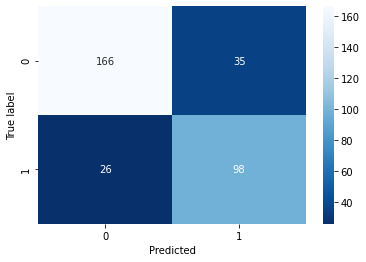

In [49]:
# матрица ошибок
y_pred = pipe_final.predict(X_test)#_proba(X_test)[:, 1]
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

# Расчет показателей
acc = accuracy_score(y_test, y_pred)
print('accuracy: ',round(acc,3), '(Доля правильных ответов)')

recall = recall_score(y_test, y_pred)
print('recall: ',round(recall ,3), '(Ошибка FN (False Negative))')

precision = precision_score(y_test, y_pred) 
print('precision: ',round(precision,3), '(Ошибка FP (False Positive))')

Покупательская активность "Снизилась" является признаком 1, следовательно:

1. Ошибка FN (False Negative) - (Recall): Модель ошибается, указывая на то, что покупательская активность осталась на "Прежнем уровне", хотя это не так. Это означает, что мы упускаем клиентов, у которых покупательская активность действительно снизилась. В нашем случае это нежелательно, поэтому необходимо минимизировать эту ошибку.

2. Ошибка FP (False Positive) - (Precision): Модель ошибается, указывая на то, что покупательская активность "Снизилась", хотя это не так. Это означает, что мы работаем с клиентами, которые остались на прежнем уровне активности и стараемся их еще больше вовлечь. В нашем случае это положительное явление.

Создание Dataframe со значениями порога ('thresholds') от 0.001 до 0.999 с шагом 0.001\
и значениями 'acc', 'recall', 'precision', 'tn', 'fp', 'fn', 'tp'

In [50]:
# Функция расчета предсказаний с учетом изменяемого порога
# Использование функции predict_proba взамен predict
def custom_predict(X, threshold):
    probs = pipe_final.predict_proba(X) 
    return (probs[:, 1] > threshold).astype(int)

# Создание Dataframe со значениями порога ('thresholds') от 0.01 до 0.99 с шагом 0.01
# и значениями 'acc', 'recall', 'precision', 'tn', 'fp', 'fn', 'tp'
thresholds = [i/1000 for i in range(1,1000)]

acc = []
recall = []
precision = []
tn = []
fp = []
fn = []
tp = []
# В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    new_preds = custom_predict(X=X_test, threshold=threshold)
    # Расчет показателей 'accuracy: ',round(acc,3), '(Доля правильных ответов)'
    acc.append(accuracy_score(y_test, new_preds))
    # Расчет показателей 'recall: ',round(recall ,3), '(Ошибка FN (False Negative))'
    recall.append(recall_score(y_test, new_preds))
    # Расчет показателей 'precision: ',round(precision,3), '(Ошибка FP (False Positive))'
    precision.append(precision_score(y_test, new_preds, zero_division=0))
    # Расчет количества ошибок по типам
    tn.append(np.sum((new_preds == 0) & (y_test == 0)))
    fp.append(np.sum((new_preds == 1) & (y_test == 0)))
    fn.append(np.sum((new_preds == 0) & (y_test == 1)))
    tp.append(np.sum((new_preds == 1) & (y_test == 1)))
    
acc, recall, precision
df_thresholds = pd.DataFrame([thresholds, acc, recall, precision, tn, fp, fn, tp]).T
df_thresholds.columns = ['thresholds', 'acc', 'recall', 'precision', 'tn', 'fp', 'fn', 'tp']


In [51]:
df_thresholds[24:28]

,thresholds,acc,recall,precision,tn,fp,fn,tp
24,0.025,0.812308,0.790323,0.736842,166.0,35.0,26.0,98.0
25,0.026,0.812308,0.790323,0.736842,166.0,35.0,26.0,98.0
26,0.027,0.812308,0.790323,0.736842,166.0,35.0,26.0,98.0
27,0.028,0.812308,0.790323,0.736842,166.0,35.0,26.0,98.0


Поиск порогового значения thresholds для минимизации ошибки FN (False Negative) - (Recall), а это значит не устранить её полностью, а минимизировать. Это значит, что при выборе порога отношения к классам может остаться минимальное количество ошибок FN.

In [52]:
thresholds_precision = df_thresholds[df_thresholds['fn']!=0].head(1)['thresholds'].values[0]
print('Манимизация ошибки FN (False Negative)  при threshold =', thresholds_precision) 
print('\nЗначения показателей при пороге = ', thresholds_precision, 'в таблице ниже')
df_thresholds[df_thresholds['thresholds']==thresholds_precision]

Манимизация ошибки FN (False Negative)  при threshold = 0.001

Значения показателей при пороге =  0.001 в таблице ниже


,thresholds,acc,recall,precision,tn,fp,fn,tp
0,0.001,0.812308,0.790323,0.736842,166.0,35.0,26.0,98.0


7.Анализ важности признаков

7.1.Оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP. 

Проведем оценку важности признаков нашей лучшей выбранной модели: `DecisionTreeClassifier(max_depth=57,max_features=15,random_state=42)`. 
Ниже представлена соответствующая оценка.

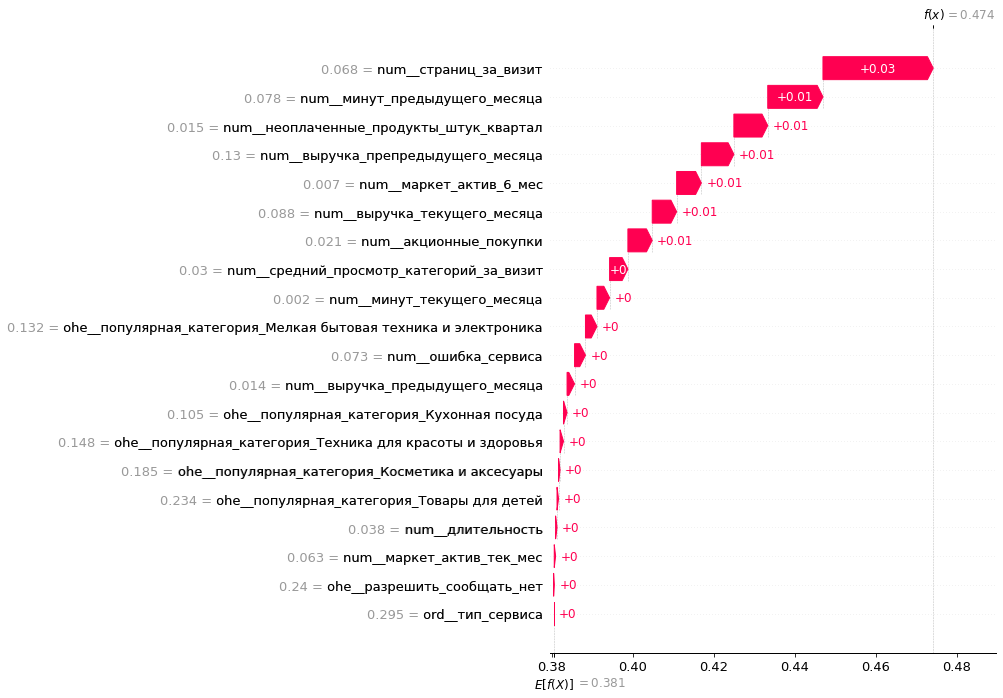

In [53]:
# Получение лучшей модели
best_model = rs.best_estimator_
# Применение преобразований к X_train
X_transformed = pd.DataFrame(data_preprocessor.transform(X_test), columns=data_preprocessor.get_feature_names_out())
# Создание explainer с использованием преобразованного X_train
explainer = shap.TreeExplainer(best_model.named_steps['models'])
# Вычисление значений SHAP
shap_values = explainer(X_transformed)

# Визуализация
shap_values_sum = 0
for i in range(1, len(shap_values)):
    shap_values_sum += shap_values[i]
    
shap.plots.waterfall(((shap_values_sum / len(shap_values)).abs[:,1]), max_display=20)

Анализ значимости признаков модели:\
`SVC(degree=5, probability=True, random_state=42)`\
более точно можно провести при помощи библиотеки `permutation_importance`

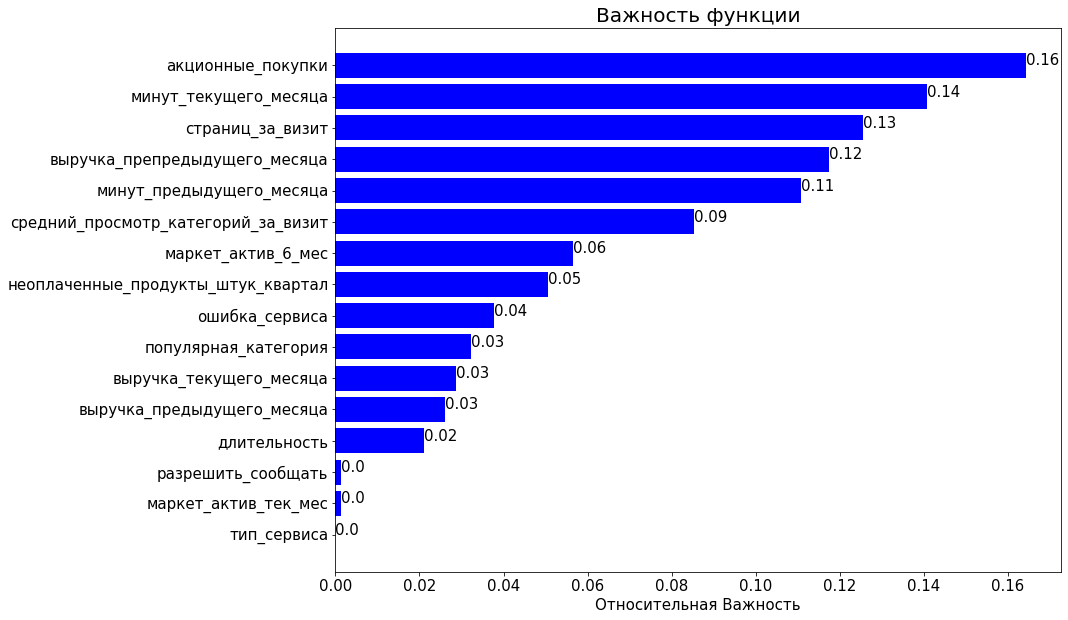

In [54]:
def f_permutation_importance(svm, X_train_svc, y_train):
    perm_importance = permutation_importance(svm, X_train_svc, y_train)
    perm_importance_normalized = perm_importance.importances_mean/perm_importance.importances_mean.sum()

    feature_names = X_train_svc.columns
    features = np.array(feature_names)

    sorted_idx = perm_importance_normalized.argsort()

    plt.figure(figsize=(13,10))
    plt.title('Важность функции',fontsize=20)
    plt.barh(features[sorted_idx], perm_importance_normalized[sorted_idx], color='b', align='center')
    plt.xlabel('Относительная Важность', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    for index, value in enumerate(perm_importance_normalized[sorted_idx]):
        plt.text(value, index,
             str(round(value,2)), fontsize=15)

    plt.show()
    
f_permutation_importance(pipe_final, X_train, y_train)

Значения важности признаков существенно меняются в зависимости от применяемых моделей. Тем не менее, большинство из них остаются важными или незначимыми, как указано в предыдущих вычислениях. Подробности можно найти ниже и выше (в графике значимости SHAP).

Например, для модели `DecisionTreeClassifier(max_depth=57,max_features=15,random_state=42)` поиск важности с использованием библиотеки `permutation_importance` показал следующее:

Наиболее значимые признаки (в порядке убывания значимости): 

+ 'акционные_покупки'
+ 'страниц_за_визит'
+ 'минут_текущегого_месяца'
+ 'минут_предыдущего_месяца'
+ 'средний_просмотр_категорий_за_визит'
+ 'неоплаченные_продукты_штук_квартал'

Менее значимые признаки :

+ 'длительность'
+ 'ошибка сервиса'
+ 'разрешить сообщать'
+ 'маркет_актив_6_мес'
+ 'популярная_категория'
+ 'тип сервиса'
+ 'выручка_предыдущего_месяца'

7.2.Выводы о значимости признаков:

Выбрана оптимальная модель: DecisionTreeClassifier(max_depth=57,max_features=15,random_state=42).

Наиболее значимые признаки (в порядке убывания значимости):

+ 'акционные_покупки'
+ 'страниц_за_визит'
+ 'минут_текущегого_месяца'
+ 'минут_предыдущего_месяца'
+ 'средний_просмотр_категорий_за_визит'
+ 'неоплаченные_продукты_штук_квартал'

Менее важные признаки :

+ 'длительность'
+ 'ошибка сервиса'
+ 'разрешить сообщать'
+ 'маркет_актив_6_мес'
+ 'популярная_категория'
+ 'тип сервиса'
+ 'выручка_предыдущего_месяца'

8. Сегментация покупателей

8.1 Выполним сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.

Выполним прогноз нашей модели с выбранным порогом и вероятностями.

Согласно исследовательскому анализу данных, прибыль имеет нормальное распределение. Для этого разделим клиентов по уровню прибыльности:
- Мало прибыльные - до 1 квантили.
- Нормально прибыльные - от 1 до 3 квантилей.
- Высоко прибыльные - больше 3 квантилей.

Для этого введем дополнительный столбец в `money` и проведем объединение таблиц.

In [55]:
# предсказание на данных с выбранным порогом
predictions_precision = custom_predict(X, threshold=thresholds_precision)
X['predictions'] = predictions_precision
X['probs'] = pipe_final.predict_proba(X)[:,1]
X['id'] = df['id']

money['категории_прибыли'] = money['прибыль'].apply(lambda x: 'мало' if x<money['прибыль'].quantile(0.25) 
                                                       else ('много' if x>money['прибыль'].quantile (0.75) 
                                                       else 'нормально'))
X = pd.merge(X, money, on='id', sort=True)


Для визуализации границы разделения на группы покупательской активности построим диаграмму рассеяния вероятности "Снижения покупательской активности" и прибыли.

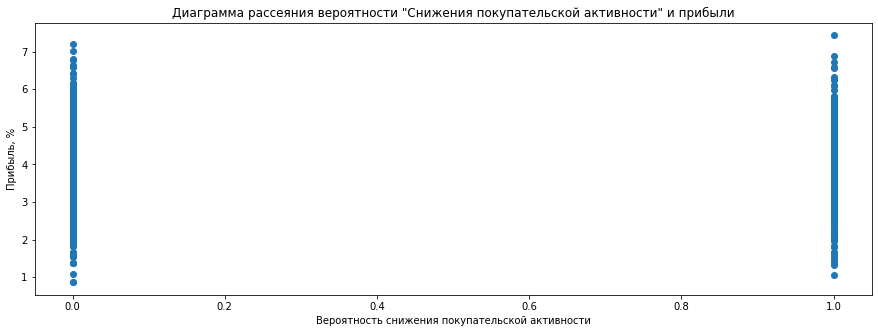

In [56]:
plt.figure(figsize=[15, 5])
plt.scatter(X.probs, X.прибыль);
plt.title('Диаграмма рассеяния вероятности "Снижения покупательской активности" и прибыли')
plt.xlabel('Вероятность снижения покупательской активности')
plt.ylabel('Прибыль, %')
plt.show()

Наша цель:

Для клиентов, чья покупательская активность снизилась, разработаем индивидуальное предложение с целью вернуть их к покупкам.
Введем категориальный столбец в данные для последующего сравнения. Определим границу разделения на уровне 0.5, так как диаграмма имеет форму "Бабочки".

In [57]:
X['категория_снижения'] = X['probs'].apply(lambda x: 'Снизилась' if x>0.5 else 'Прежний уровень')                          

8.2 Проведем исследование группы покупателей. 

Для анализа выделим группу с низким доходом и высокой вероятностью снижения покупательской активности. Для сравнения оставим группу с сохраненным уровнем активности, которая послужит эталоном для определения целевого уровня и принятия решений на основе важных признаков, выявленных на 7-м этапе работы.

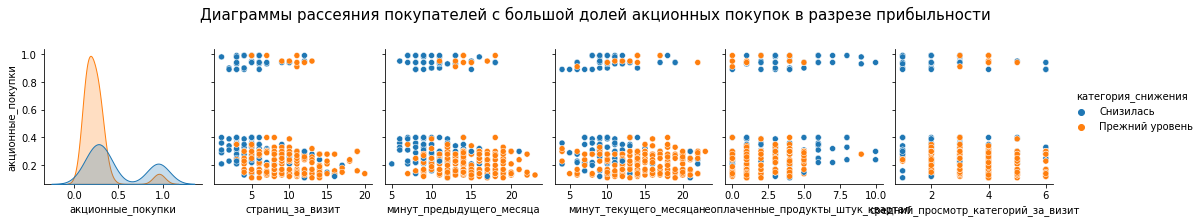

In [58]:
x=['акционные_покупки',
   'страниц_за_визит',
   'минут_предыдущего_месяца',
   'минут_текущего_месяца',
   'неоплаченные_продукты_штук_квартал',
   'средний_просмотр_категорий_за_визит'
  ]
y=['акционные_покупки'
  
  ]

g = sns.pairplot(X.query('категории_прибыли == "мало"'), hue='категория_снижения', x_vars=x, y_vars=y)
g.fig.suptitle("Диаграммы рассеяния покупателей с большой долей акционных покупок в разрезе прибыльности", y=1.2, fontsize=15)
plt.show()

**Выделим группу клиентов, в доле покупок которых акционные товары не превышают 50 %.**\
Сформулируем предложение по работе с сегментом для увеличения покупательской активности.

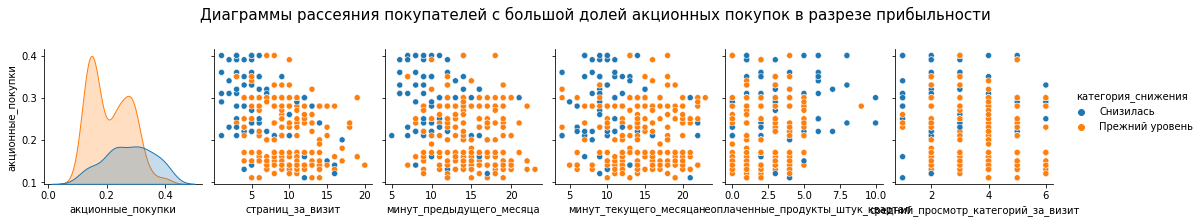

In [59]:
x=['акционные_покупки',
   'страниц_за_визит',
   'минут_предыдущего_месяца',
   'минут_текущего_месяца',
   'неоплаченные_продукты_штук_квартал',
   'средний_просмотр_категорий_за_визит'
  ]
y=['акционные_покупки'
  ]

g = sns.pairplot(X.query('категории_прибыли == "мало" & акционные_покупки < 0.5'), hue='категория_снижения', x_vars=x, y_vars=y)
g.fig.suptitle("Диаграммы рассеяния покупателей с большой долей акционных покупок в разрезе прибыльности", y=1.2, fontsize=15)
plt.show()

**Промежуточный итог**

В данном сегменте наблюдается снижение покупательской активности клиентов, при этом доля акционных покупок различается (снизилась активность у покупателей, у которых процент акционных покупок приближен к 50%). Возможно, это связано с уменьшением количества рекламных кампаний по проводимым акциям.

Предлагается выделить таких клиентов в отдельную рабочую группу и для увеличения их активности:

- Чаще предлагать им акционные товары и проводить уведомления и рекламные кампании.
- Удерживать их внимание на страницах сайта - замечено, что при просмотре более 6 страниц покупательская активность сохраняется на прежнем уровне.
- Увеличение числа просмотренных страниц автоматически приведет к увеличению времени, проведенного за визит. При посещении более 10 минут вероятность сохранения покупательской активности увеличивается.
- Если в корзине более 6 неоплаченных продуктов, уведомлять об этом покупателя для повышения их активности.


Выделим группу клиентов, с высокой  прибыльностью и количества неоплаченных покупок в корзине больше 4
Сформулируем предложения по работе с данным сегментом для увеличения покупательской активности.

Распределение прибыли от клиентов подчиняется нормальному распределению. Определим, что наибольшая прибыль клиентов находится за пределами третьего квартиля этого распределения.

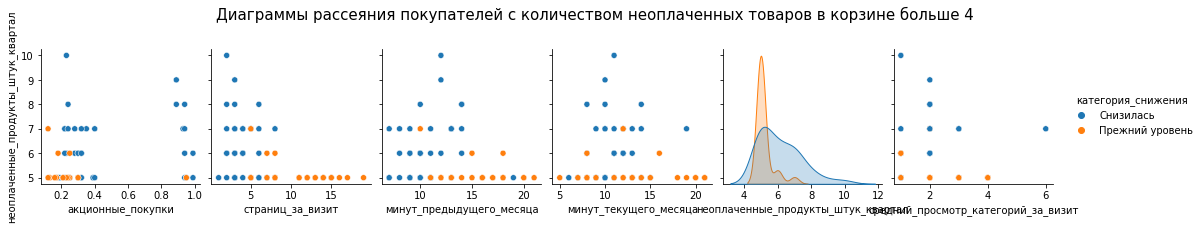

In [60]:
x=['акционные_покупки',
   'страниц_за_визит',
   'минут_предыдущего_месяца',
   'минут_текущего_месяца',
   'неоплаченные_продукты_штук_квартал',
   'средний_просмотр_категорий_за_визит'
  ]
y=['неоплаченные_продукты_штук_квартал'
  
  ]

g = sns.pairplot(X.query('категории_прибыли == "много" & неоплаченные_продукты_штук_квартал > 4'), hue='категория_снижения', x_vars=x, y_vars=y)
g.fig.suptitle("Диаграммы рассеяния покупателей с количеством неоплаченных товаров в корзине больше 4", y=1.2, fontsize=15)
plt.show()

Промежуточный итог

В данном сегменте наблюдается значительное снижение покупательской активности клиентов.

Предлагается выделить таких клиентов в отдельную рабочую группу и для увеличения их активности:

При количестве неоплаченных продуктов в корзине более 6, уведомлять об этом покупателя, что может вернуть его на сайт, повысить важные метрики и увеличить покупательскую активность.

В целом, рекомендации аналогичны предыдущей группе.

8.3. Подведем итоги  о сегментах

Определили сегменты и провели анализ:

Группа клиентов, доля акционных покупок которых не превышает 50%:

В данном сегменте наблюдается снижение покупательской активности, особенно у клиентов с долей акционных покупок, приближенной к 50%. Возможно, это связано со снижением рекламных компаний по акционным товарам.

Предлагается выделить таких клиентов в отдельную группу и для увеличения их активности реализовать следующие меры:
- Увеличить предложение акционных товаров и проводить уведомления и рекламные кампании.
- Задерживать внимание клиентов на страницах сайта; замечено, что при просмотре более 6 страниц покупательская активность остается на прежнем уровне.
- Увеличение просмотренных страниц автоматически повлечет увеличение времени, проведенного на визите; при более чем 10 минутах вероятность покупательской активности остается на прежнем уровне.
- При наличии более 6 неоплаченных продуктов в корзине, уведомлять об этом клиента для повышения его активности.

Группа клиентов с высокой прибыльностью и более чем 4 неоплаченными покупками в корзине:

В данном сегменте также наблюдается значительное снижение покупательской активности.

Предлагается выделить таких клиентов в отдельную рабочую группу и реализовать следующие меры для увеличения их активности:
- При наличии более 6 неоплаченных продуктов в корзине, уведомлять об этом клиента, что возможно приведет его обратно на сайт, повысит остальные важные метрики и увеличит его покупательную активность.

В общем случае, рекомендации для обеих групп аналогичны.

9.Общий вывод

Сделаем вывод

1. В исследовании была поставлена задача:
    - Разработать решение для персонализации предложений постоянным клиентам с целью увеличения их покупательской активности.

2. Для выполнения задачи клиент предоставил данные в виде таблиц:
    - `market_file.csv`: содержит информацию о поведении клиентов на сайте, коммуникациях с ними и их покупательном поведении.
    - `market_money.csv`: данные о выручке, полученной магазином от клиента за период взаимодействия с сайтом.
    - `market_time.csv`: данные о времени (в минутах), проведенном клиентом на сайте в течение периода.
    - `money.csv`: сведения о среднемесячной прибыли каждого клиента за последние 3 месяца.

   Проведена предобработка данных:
    - Изменены названия столбцов, переведены в нижний регистр и заменены пробелы на подчеркивания.
    - В `market_file`:
        - В колонке `тип_сервиса` данные "стандартт" заменены на "стандарт".
        - Изменены типы данных столбцов:
            - `маркет_актив_6_мес` на `float`.
            - `акционные_покупки` на `float`.
    - В `market_money`:
        - Изменен тип данных столбца `выручка` на `float`.
    - В `market_time`:
        - В колонке `период` данные "предыдцщий_месяц" заменены на "предыдущий_месяц".

   Проведен исследовательский анализ данных и подготовка таблиц для анализа.

3. Для поиска лучшей модели:
    - Проведен корреляционный анализ данных для исключения мультиколлинеарности.
    - Подготовлены пайплайны для выбора лучшей модели как в ручном, так и в автоматическом режиме.

4. Лучшей моделью была выбрана `SVC(degree=5, probability=True, random_state=42)`, применен `RobustScaler()` к признаку 'num'.

5. Для указанной модели определены важные и неважные признаки:
    При обучении модели можно удалить малозначимые признаки:
    - 'ошибка_сервиса'
    - 'длительность'
    - 'разрешить сообщать'
    - 'выручка_предыдущего_месяца'
    - 'тип сервиса'
    - 'выручка_текущего_месяца'

    Особое внимание при принятии бизнес-решений необходимо уделить значимым признакам:
    - 'акционные_покупки'
    - 'страниц_за_визит'
    - 'минут_предыдущего_месяца'
    - 'минут_текущего_месяца'
    - 'средний_просмотр_категорий_за_визит'
    - 'популярная категория'

6. Определены сегменты клиентов и проведен анализ:
    - Группа клиентов, доля акционных покупок которых не превышает 50%:
        В этом сегменте наблюдается снижение покупательской активности клиентов, особенно тех, у кого доля акционных покупок близка к 50%. Возможно, это связано с уменьшением рекламных компаний по акциям. Для увеличения активности предлагается проводить больше рекламных компаний и предлагать больше акционных товаров.

    - Группа клиентов с высокой прибыльностью и более 4 неоплаченными покупками в корзине:
        В этом сегменте также наблюдается снижение покупательской активности. Предлагается уведомлять клиентов о наличии более 6 неоплаченных продуктов в корзине для повышения их активности.

   В общем, рекомендации для обеих групп аналогичны.